In [24]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt

Loading data: Since I have several csv files I have to load them into pandas dfs and then concatenate them.

In [2]:
# Loading the data
hiv_data = pd.read_csv("hiv_data.csv")

In [3]:
# Load top of the HIV data as well as info
hiv_data.head()

,gender,age,occupation,partner_count,condom_use_last_month,location,marital_status,educational_level,awareness_of_hiv,sex_last_month,drug_use,std_last_year,commercial_sex_last_year,hiv_test_last_year,hiv_test_result
0,M,3(29-40),healthcare worker,1,no,Tashkent city,married,college or above,yes,yes,no,no,no,yes,0
1,M,3(29-40),healthcare worker,1,no,Namangan region,divorced or widowed,college or above,no,no,no,no,no,no,0
2,F,2(18-28),other,1,no,Surkhandarya region,married,high school or lyceum,yes,no,no,no,no,yes,0
3,F,3(29-40),healthcare worker,1,no,Syrdarya region,married,college or above,yes,yes,no,no,no,yes,0
4,M,2(18-28),other,1,no,Bukhara region,married,high school or lyceum,yes,yes,no,no,no,no,0


In [4]:
hiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    9978 non-null   object
 1   age                       9978 non-null   object
 2   occupation                9978 non-null   object
 3   partner_count             9978 non-null   int64 
 4   condom_use_last_month     9978 non-null   object
 5   location                  9978 non-null   object
 6   marital_status            9978 non-null   object
 7   educational_level         9978 non-null   object
 8   awareness_of_hiv          9978 non-null   object
 9   sex_last_month            9978 non-null   object
 10  drug_use                  9978 non-null   object
 11  std_last_year             9978 non-null   object
 12  commercial_sex_last_year  9978 non-null   object
 13  hiv_test_last_year        9978 non-null   object
 14  hiv_test_result         

In [5]:
# Get all columns with categorical data
cat_columns = hiv_data.select_dtypes(include=['object']).columns

# Loop through each categorical column and print value counts
for column in cat_columns:
    print(f"Value counts for {column}:")
    print(hiv_data[column].value_counts())
    print("\n")

Value counts for gender:
M    5540
F    4438
Name: gender, dtype: int64


Value counts for age:
2(18-28)    5138
3(29-40)    4058
4(41-48)     687
1(15-17)      57
6(56-65)      20
7(>66)         9
5(49-55)       9
Name: age, dtype: int64


Value counts for occupation:
other                4108
healthcare worker    3369
unemployed           1692
sex worker            809
Name: occupation, dtype: int64


Value counts for condom_use_last_month:
no       9451
yes       272
other     255
Name: condom_use_last_month, dtype: int64


Value counts for location:
Tashkent city                 1545
Tashkent region               1276
Syrdarya region               1177
Khorezm region                 905
Andijan region                 862
Samarkand region               671
Ferghana region                651
Surkhandarya region            577
Jizzakh region                 503
Namangan region                479
Bukhara region                 439
Kashkadarya region             301
Republic of Karakalp

In [6]:
# Get all columns with numerical data
num_columns = hiv_data.select_dtypes(include=['int64']).columns

# Loop through each categorical column and print value counts
for column in num_columns:
    print(f"Value counts for {column}:")
    print(hiv_data[column].value_counts())
    print("\n")

Value counts for partner_count:
1    8665
3     570
2     298
4     244
0     104
5      97
Name: partner_count, dtype: int64


Value counts for hiv_test_result:
0    7693
1    2285
Name: hiv_test_result, dtype: int64




## Data cleaning

First, we check for duplicates:

In [7]:
duplicates = hiv_data[hiv_data.duplicated()]
duplicates["hiv_test_result"].value_counts()

0    3301
1     332
Name: hiv_test_result, dtype: int64

As can be seen the number of hiv negative test result duplicates is a 10 times more than then number of hiv positive test result duplicates. This makes it possible to simply remove all the duplicates in the test survey as it will imporve the balance in the hiv test result class, which is currently very imbalanced.

In [8]:
hiv_data_no_dupls = hiv_data.drop_duplicates().reset_index(drop=True)

## Data processing

Based on the output of value counts for categorical data, we can convert a few variables into binary variables. We start with gender that we convert into binary variable (M to 1, F to 0).

In [9]:
hiv_data_no_dupls['gender'].replace(to_replace=['M','F'], value=[1,0],inplace=True)
hiv_data_no_dupls.head()

,gender,age,occupation,partner_count,condom_use_last_month,location,marital_status,educational_level,awareness_of_hiv,sex_last_month,drug_use,std_last_year,commercial_sex_last_year,hiv_test_last_year,hiv_test_result
0,1,3(29-40),healthcare worker,1,no,Tashkent city,married,college or above,yes,yes,no,no,no,yes,0
1,1,3(29-40),healthcare worker,1,no,Namangan region,divorced or widowed,college or above,no,no,no,no,no,no,0
2,0,2(18-28),other,1,no,Surkhandarya region,married,high school or lyceum,yes,no,no,no,no,yes,0
3,0,3(29-40),healthcare worker,1,no,Syrdarya region,married,college or above,yes,yes,no,no,no,yes,0
4,1,2(18-28),other,1,no,Bukhara region,married,high school or lyceum,yes,yes,no,no,no,no,0


We do the same for awareness_of_hiv, sex_last_month, drug_use, std_last_year, commercial_sex_last_year and hiv_test_last_year, where we replace 'yes' with 1, 'no' with 0.

In [10]:
to_binary = ['awareness_of_hiv', 'sex_last_month', 'drug_use', 'std_last_year', 'commercial_sex_last_year', 'hiv_test_last_year']
for col in to_binary:
    hiv_data_no_dupls[col].replace(to_replace=['yes','no'], value=[1,0], inplace=True)

hiv_data_no_dupls.head()

,gender,age,occupation,partner_count,condom_use_last_month,location,marital_status,educational_level,awareness_of_hiv,sex_last_month,drug_use,std_last_year,commercial_sex_last_year,hiv_test_last_year,hiv_test_result
0,1,3(29-40),healthcare worker,1,no,Tashkent city,married,college or above,1,1,0,0,0,1,0
1,1,3(29-40),healthcare worker,1,no,Namangan region,divorced or widowed,college or above,0,0,0,0,0,0,0
2,0,2(18-28),other,1,no,Surkhandarya region,married,high school or lyceum,1,0,0,0,0,1,0
3,0,3(29-40),healthcare worker,1,no,Syrdarya region,married,college or above,1,1,0,0,0,1,0
4,1,2(18-28),other,1,no,Bukhara region,married,high school or lyceum,1,1,0,0,0,0,0


Now, we are going to One-Hot encode the remaining nominal categorical variables, i.e., age, occupation, location, marital_status, educational_level and condom_use_last_month. We will use drop_first parameter in order to remove redundant dummy variables and avid the issue of multicollinearity.

In [11]:
hiv_data_enc = pd.get_dummies(hiv_data_no_dupls, columns=['age', 'occupation', 'location', 'marital_status', 
                                                 'educational_level', 'condom_use_last_month'],
                             drop_first=True)
hiv_data_enc.head()

,gender,partner_count,awareness_of_hiv,sex_last_month,drug_use,std_last_year,commercial_sex_last_year,hiv_test_last_year,hiv_test_result,age_2(18-28),...,location_Tashkent region,marital_status_divorced or widowed,marital_status_married,marital_status_unmarried,educational_level_college or above,educational_level_high school or lyceum,educational_level_middle school,educational_level_primary school,condom_use_last_month_other,condom_use_last_month_yes
0,1,1,1,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
3,0,1,1,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


We have only one column, 'partner_count', that we want to scale using MinMax scaling method. We know max=5, min=0, so we simply divide all values by 5: 

In [12]:
hiv_data_enc['partner_count'] = hiv_data_enc['partner_count']/5
hiv_data_enc['partner_count'].value_counts()

0.2    5099
0.6     527
0.4     290
0.8     230
0.0     104
1.0      95
Name: partner_count, dtype: int64

The data looks good for splitting and training.

## Splitting into training and testing sets

In [13]:
# Separate features (X) and target variable (y)
X = hiv_data_enc.drop('hiv_test_result', axis=1)
y = hiv_data_enc['hiv_test_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
y_train.value_counts()

0    3525
1    1551
Name: hiv_test_result, dtype: int64

Note that the target class, 'hiv_test_result', is imbalanced as the number of negative test results is 2.27 times more than the number of positive test results. In order to make the training set more balanced we use Synthetic Minority Over-sampling Technique (SMOTE) technique. This is important because our goal is to identify instances of HIV positive test results and in imbalanced datasets, a classifier might become biased towards the majority class and might not perform well in identifying instances of the minority class (in our case, HIV positive cases).

In [15]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [16]:
print("Value counts before resampling:\n", y_train.value_counts())
print("Value counts after resampling:\n", y_train_resampled.value_counts())

Value counts before resampling:
 0    3525
1    1551
Name: hiv_test_result, dtype: int64
Value counts after resampling:
 0    3525
1    3525
Name: hiv_test_result, dtype: int64


# Building classifiers

We will consider the most known classifiers inlcuding Lagistic Regression, Decision Tree, Random Forest and SVM. We will optimize each model and then compare them using AUC of the ROC curve.

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
log_clf =LogisticRegression()

In [ ]:
log_clf.fit(X_train_resampled, y_train_resampled)

In [ ]:
# We now have a working Logistic Regression model. Let’s try it out on a few instances from the training set:

some_data = X_train.iloc[:10]
some_targets = y_train.iloc[:10]
print("Predictions:", log_clf.predict(some_data))
print("Test results:", list(some_targets))

In [ ]:
# Now we want to measure this model’s key metrics on the whole testing set using Scikit-Learn’s metrics functions:

hiv_results_predictions = log_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hiv_results_predictions))
print("Classification Report:\n", classification_report(y_test, hiv_results_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, hiv_results_predictions))

The model has overall accuracy score of 0.82 and recall score for the HIV positive test results of 0.84. This is fairly good but we want to use grid search to find the best hyperparameters for this model.

### Grid Search

We define a grid of hyper-parameters for logistic regression.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

In [ ]:
logreg = LogisticRegression()

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Define the scoring parameter as recall for class 1
scorer = make_scorer(recall_score, pos_label=1)

# Create GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Access the best estimator (model)
log_clf_recall = grid_search.best_estimator_

In [ ]:
# Now we want to measure this model’s key metrics on the whole testing set using Scikit-Learn’s metrics functions:

hiv_results_predictions = log_clf_recall.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hiv_results_predictions))
print("Classification Report:\n", classification_report(y_test, hiv_results_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, hiv_results_predictions))

Now, we want to do grid search based on a different scoring parameter - an roc_auc score for the positive class (HIV positive test results).

In [ ]:
from sklearn.metrics import make_scorer, roc_auc_score

# Define the scoring parameter as roc_auc for the positive class
#scorer = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr', labels=[1])

# Create GridSearchCV
grid_search_roc_auc = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
grid_search_roc_auc.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_roc_auc.best_params_)

# Access the best estimator (model)
log_clf_best_roc_auc = grid_search_roc_auc.best_estimator_

In [ ]:
# Now we want to measure this model’s key metrics on the whole testing set using Scikit-Learn’s metrics functions:

hiv_results_predictions = log_clf_best_roc_auc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hiv_results_predictions))
print("Classification Report:\n", classification_report(y_test, hiv_results_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, hiv_results_predictions))

We have three logistic regression models that all scored relatively similar scores in recall and accuracy. Since they all performed very similarly, we will choose the model that was optimized for the roc_auc score of the HIV positive test results, which is model log_clf_best_roc_auc.

### Plotting ROC curve

In [ ]:
# Predict probabilities for the positive class (class 1)

y_prob = log_clf_best_roc_auc.predict_proba(X_test)[:,1]

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

The Logistic Regression based model does fairly well.

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_resampled, y_train_resampled)

In [ ]:
# We now have a working Decison Tree model. Let’s try it out on a few instances from the training set:

some_data = X_train.iloc[:10]
some_targets = y_train.iloc[:10]
print("Predictions:", tree_clf.predict(some_data))
print("Test results:", list(some_targets))

In [ ]:
# Now we want to measure this model’s key metrics on the whole testing set using Scikit-Learn’s metrics functions:

hiv_results_predictions_tree = tree_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hiv_results_predictions_tree))
print("Classification Report:\n", classification_report(y_test, hiv_results_predictions_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, hiv_results_predictions_tree))

### Fune-tuning hyperparameters of Decision Tree Classifier for the Highest Recall

In [ ]:
# Use GridSearchCV for Hyper-Parameter Tuning for DecisionTreeClassifier

#Criterion
criterion = ["gini", "entropy"]

#Splitter
splitter = ["best", "random"]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [5, 15, 25, 35]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 7, 9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
dt_param_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [ ]:
DT = DecisionTreeClassifier(random_state=100)

DT_grid_recall = GridSearchCV(DT, dt_param_grid,scoring = 'recall', cv=5, n_jobs=-1)
### fit the randomized model

DT_grid_recall.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Get the best parameters from the grid search
best_params_recall = DT_grid_recall.best_params_
print("Best Hyperparameters:", best_params_recall)

# best decision tree classifier
dt_clf_recall = DT_grid_recall.best_estimator_

In [ ]:
# Now we want to measure this model’s key metrics on the whole testing set using Scikit-Learn’s metrics functions:
hiv_results_predictions_dt_recall = dt_clf_recall.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hiv_results_predictions_dt_recall))
print("Classification Report:\n", classification_report(y_test, hiv_results_predictions_dt_recall))
print("Confusion Matrix:\n", confusion_matrix(y_test, hiv_results_predictions_dt_recall))

In [ ]:
DT = DecisionTreeClassifier(random_state=100)

DT_roc = GridSearchCV(DT, dt_param_grid, scoring = 'roc_auc', cv=5, n_jobs=-1)
### fit the randomized model
DT_roc.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Get the best parameters from the grid search
best_params_roc = DT_roc.best_params_
print("Best Hyperparameters:", best_params_roc)

# best decision tree classifier
dt_clf_roc = DT_roc.best_estimator_

# Now we want to measure this model’s key metrics on the whole testing set using Scikit-Learn’s metrics functions:
hiv_results_predictions_dt_roc = dt_clf_roc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hiv_results_predictions_dt_roc))
print("Classification Report:\n", classification_report(y_test, hiv_results_predictions_dt_roc))
print("Confusion Matrix:\n", confusion_matrix(y_test, hiv_results_predictions_dt_roc))

It turns out the grid search optimized for recall score and roc_auc score result in the exact same best hyper-parameters, and hence, the same Decision Trree model. Based on the key scores, including the recall score for the HIV positive test results class and accuracy, the Decision Tree models are performing slightly worse than the Logistic Regression Model.

Now, I will test-dump this model into the .pkl file for Flask deployment

## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Now we want to measure this model’s key metrics on the testing set using Scikit-Learn’s metrics functions:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.797478329393223
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       867
           1       0.65      0.79      0.71       402

    accuracy                           0.80      1269
   macro avg       0.77      0.80      0.78      1269
weighted avg       0.81      0.80      0.80      1269

Confusion Matrix:
 [[695 172]
 [ 85 317]]


### Fune-tuning hyperparameters of Random Forest Classifier for the Highest Recall

In [19]:
#Criterion
criterion = ["gini", "entropy"]

# Number of features to consider at every split
max_features = ['sqrt','log2']

# Maximum number of levels in tree
max_depth = [15, 20]

# Minimum number of samples required to split a node
min_samples_split = [9, 14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 6]

# Create the random grid
rf_param_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [20]:
rf_clf = RandomForestClassifier(random_state = 42)

rf_grid_recall = GridSearchCV(rf_clf, rf_param_grid, scoring='recall', cv=5,  n_jobs=1)

rf_grid_recall.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [4, 6],
                         'min_samples_split': [9, 14]},
             scoring='recall')

In [21]:
# Get the best parameters from the grid search
best_params_rf_recall = rf_grid_recall.best_params_
print("Best Hyperparameters:", best_params_rf_recall)

# Get the best model from the random search
best_model_rf_recall = rf_grid_recall.best_estimator_

# Make predictions on the test set
y_pred_rf_recall = best_model_rf_recall.predict(X_test)

# Now we want to measure this model’s key metrics on the whole training set using Scikit-Learn’s metrics functions:
print("Accuracy:", accuracy_score(y_test, y_pred_rf_recall))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_recall))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_recall))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 9}
Accuracy: 0.8384554767533491
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87       867
           1       0.68      0.91      0.78       402

    accuracy                           0.84      1269
   macro avg       0.82      0.86      0.83      1269
weighted avg       0.87      0.84      0.84      1269

Confusion Matrix:
 [[699 168]
 [ 37 365]]


In [ ]:
#Criterion
criterion = ["gini", "entropy"]

# Number of features to consider at every split
max_features = ['sqrt','log2']

# Maximum number of levels in tree
max_depth = [15, 20]

# Minimum number of samples required to split a node
min_samples_split = [9, 14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 6]

# Create the random grid
rf_param_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

rf_clf = RandomForestClassifier(random_state = 42)

rf_grid_recall = GridSearchCV(rf_clf, rf_param_grid, scoring='recall', cv=5,  n_jobs=-1)

rf_grid_recall.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params_rf_recall = rf_grid_recall.best_params_
print("Best Hyperparameters:", best_params_rf_recall)

# Get the best model from the random search
best_model_rf_recall = rf_grid_recall.best_estimator_

# Make predictions on the test set
y_pred_rf_recall = best_model_rf_recall.predict(X_test)

# Now we want to measure this model’s key metrics on the whole training set using Scikit-Learn’s metrics functions:
print("Accuracy:", accuracy_score(y_test, y_pred_rf_recall))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_recall))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_recall))

In [ ]:
#Criterion
criterion = ["gini", "entropy"]

# Number of features to consider at every split
max_features = ['sqrt','log2']

# Maximum number of levels in tree
max_depth = [25, 30]

# Minimum number of samples required to split a node
min_samples_split = [9, 14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 6]

# Create the random grid
rf_param_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

rf_clf = RandomForestClassifier(random_state = 42)

rf_grid = GridSearchCV(rf_clf, rf_param_grid, scoring='roc_auc', cv=5,  n_jobs=-1)

rf_grid.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params_rf_roc = rf_grid_recall.best_params_
print("Best Hyperparameters:", best_params_rf_roc)

# Get the best model from the random search
best_model_rf_roc = rf_grid.best_estimator_

# Make predictions on the test set
y_pred_rf_roc = best_model_rf_roc.predict(X_test)

# Now we want to measure this model’s key metrics on the whole training set using Scikit-Learn’s metrics functions:
print("Accuracy:", accuracy_score(y_test, y_pred_rf_roc))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_roc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_roc))

## Plotting ROC curve and calculating AUC for best models

In [ ]:
# Log Regression
# Predict probabilities for the positive HIV cases

y_prob_log = log_clf_best_roc_auc.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Decision Tree
# Predict probabilities for the positive HIV cases

y_prob_dt = dt_clf_roc.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Fores
# Predict probabilities for the positive HIV cases

y_prob_rf = best_model_rf_roc.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='ROC curve for LR(area = {:.2f})'.format(roc_auc_log))
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='ROC curve for DT(area = {:.2f})'.format(roc_auc_dt))
plt.plot(fpr_rf, tpr_rf, color='pink', lw=2, label='ROC curve for RF(area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Logistic Regression, Decision Tree and RF')
plt.legend(loc='lower right')
plt.show()

Based on the above ROC curves of three different models, Random Forest zClassifier is the most robust.

In [ ]:
# Log Regression
# Predict probabilities for the positive HIV cases

y_prob_log = log_clf_recall.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Decision Tree
# Predict probabilities for the positive HIV cases

y_prob_dt = dt_clf_recall.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Fores
# Predict probabilities for the positive HIV cases

y_prob_rf = best_model_rf_recall.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='ROC curve for LR(area = {:.2f})'.format(roc_auc_log))
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='ROC curve for DT(area = {:.2f})'.format(roc_auc_dt))
plt.plot(fpr_rf, tpr_rf, color='pink', lw=2, label='ROC curve for RF(area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Logistic Regression, Decision Tree and RF')
plt.legend(loc='lower right')
plt.show()

Feature ranking:
1. drug_use: 0.18962885113377448
2. occupation_unemployed: 0.17393529627388718
3. occupation_sex worker: 0.07458716252915114
4. educational_level_college or above: 0.06459749113012538
5. occupation_other: 0.055545723859966055
6. commercial_sex_last_year: 0.05480297267360416
7. partner_count: 0.053984108727975405
8. educational_level_middle school: 0.04401913961249973
9. educational_level_high school or lyceum: 0.03197442223461342
10. age_4(41-48): 0.02688852114778197
11. condom_use_last_month_other: 0.024793526609530974
12. sex_last_month: 0.01669773674335
13. hiv_test_last_year: 0.01347163686667929
14. std_last_year: 0.013379564115745302
15. gender: 0.012934535327079711
16. age_3(29-40): 0.012812998372283172
17. age_2(18-28): 0.012496052389748677
18. awareness_of_hiv: 0.012293406860921521
19. educational_level_primary school: 0.011169010286916673
20. marital_status_married: 0.011029236214917668
21. condom_use_last_month_yes: 0.009744810005995497
22. marital_status_div

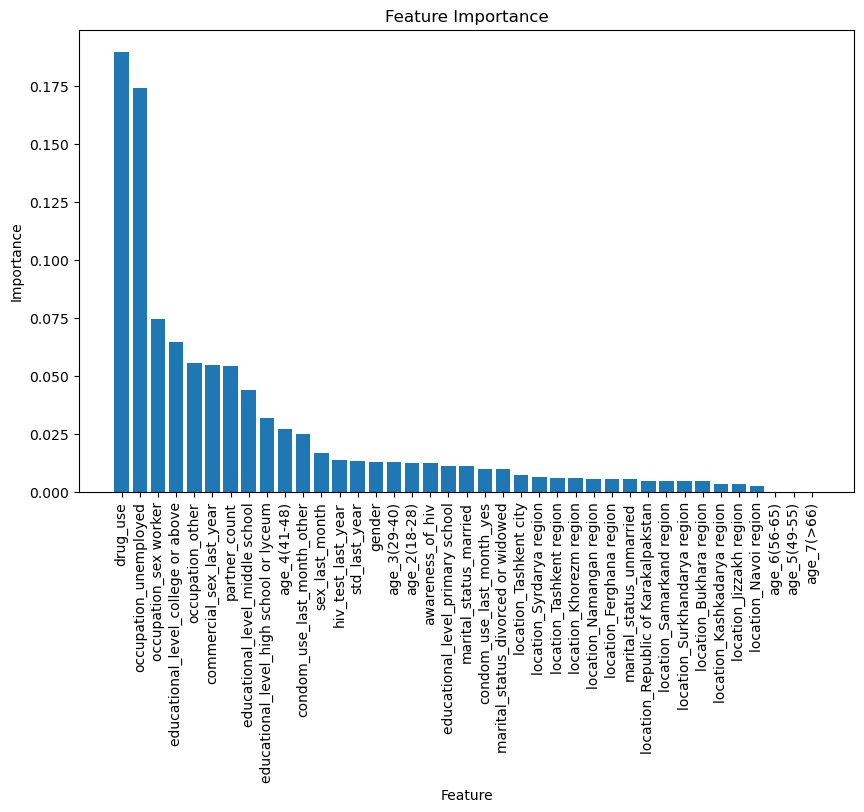

In [25]:
# Get feature importances
feature_importance = best_model_rf_recall.feature_importances_

# Get feature names
feature_names = [f"{i}" for i in X_test.columns.to_list()]

# Sort feature importances in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for i in range(X_test.shape[1]):
    print(f"{i + 1}. {feature_names[sorted_idx[i]]}: {feature_importance[sorted_idx[i]]}")
    
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X_test.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

The model based on optimizing recall for Random Forests is the most robust. Hence we dump it for Flask deployment.

In [22]:
import pickle
with open('model.pkl', 'wb') as files:
    pickle.dump(best_model_rf_recall, files)